## NLP Project 1 : Review Project Analysis.


### DESCRIPTION

Help a leading mobile brand understand the voice of the customer by analyzing the reviews of their product on Amazon and the topics that customers are talking about. You will perform topic modeling on specific parts of speech. You’ll finally interpret the emerging topics.

**Problem Statement:**

A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

**Domain:** Amazon reviews for a leading phone brand

Analysis to be done: POS tagging, topic modeling using LDA, and topic interpretation

**Content:**

**Dataset:** ‘K8 Reviews v0.2.csv’

**Columns:**

1. Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)
2. Reviews: The main text of the review

### Steps to perform:

Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.

Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. Finally, give business-friendly names to the topics and make a table for business.

### Tasks: 

1. Read the .csv file using Pandas. Take a look at the top few records.
2. Normalize casings for the review text and extract the text into a list for easier manipulation.
3.  Tokenize the reviews using NLTKs word_tokenize function.
4. Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.
5. For the topic model, we should  want to include only nouns.
  1. Find out all the POS tags that correspond to nouns.
  2. Limit the data to only terms with these tags.
6. Lemmatize. 
  1. Different forms of the terms need to be treated as one.
  2. No need to provide POS tag to lemmatizer for now.
7. Remove stopwords and punctuation (if there are any). 
8. Create a topic model using LDA on the cleaned-up data with 12 topics.
  1. Print out the top terms for each topic.
  2. What is the coherence of the model with the c_v metric?
9. Analyze the topics through the business lens.
  1. Determine which of the topics can be combined.
10. Create topic model using LDA with what you think is the optimal number of topics
  1. What is the coherence of the model?
11. The business should  be able to interpret the topics.
  1. Name each of the identified topics.
  2. Create a table with the topic name and the top 10 terms in each to present to the  business.

### Import the necessary libraries

In [1]:
#Let's import Numpy and pandas for dataframes
import numpy as np
import pandas as pd

#Let's import nltk library for tokenization, lemmatization, stopwords, pos tags and FreqDist
import nltk
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk import FreqDist

#Let's import string library for punctuation and string manipulations 
import string

#Let's import Gensim library for LDA model creation,Corpora in gensim to create the id2word Dictionary and corpus of terms
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

#Let's import matplotlib and pyLDAvis for the LDA model visualization
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models

#Let's import warnings to ignore deprecation warnings
import warnings
warnings.filterwarnings('ignore')

#### 1. Read the .csv file using Pandas. Take a look at the top few records.

In [2]:
#Let's load the dataset into the environment
reviews_data = pd.read_csv('K8_Reviews_v0.2.csv')

#Let's look at the top 5 records from the dataset
reviews_data.head() 

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


#### 2. Normalize casings for the review text and extract the text into a list for easier manipulation.

In [3]:
#Let's Normalize the text by reducing to lower case and convert the text into a list
review_list = [review.lower() for review in reviews_data['review']]
print(review_list[:5])

['good but need updates and improvements', "worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.", 'when i will get my 10% cash back.... its already 15 january..', 'good', 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon']


#### 3. Tokenize the reviews using NLTKs word_tokenize function.

In [4]:
#Let's Tokenize the reviews 
review_words = [word_tokenize(review) for review in review_list]
print(review_words[:5])

[['good', 'but', 'need', 'updates', 'and', 'improvements'], ['worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', ',', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged.this', 'is', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'is', 'not', 'at', 'all', 'expected', ',', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000mah', '&', 'booster', 'charger', 'is', 'fake', ',', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged.do', "n't", 'know', 'how', 'lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us.please', 'don', ';', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me', '.'], ['when', 'i', 'will', 'get', 'my', '10', '%', 'cash', 'back', '....', 'its', 'already', '15', 'january', '..'], ['good'], ['the', 'worst', 'phone', 'everthe

#### 4. Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.


In [5]:
#Let's perform POS tagging using NLTK pos tagger
pos_tagged_review = [pos_tag(review) for review in review_words]
print('Length of POS tags = ',len(pos_tagged_review))
print(pos_tagged_review[:5])

Length of POS tags =  14675
[[('good', 'JJ'), ('but', 'CC'), ('need', 'VBP'), ('updates', 'NNS'), ('and', 'CC'), ('improvements', 'NNS')], [('worst', 'JJS'), ('mobile', 'NN'), ('i', 'NN'), ('have', 'VBP'), ('bought', 'VBN'), ('ever', 'RB'), (',', ','), ('battery', 'NN'), ('is', 'VBZ'), ('draining', 'VBG'), ('like', 'IN'), ('hell', 'NN'), (',', ','), ('backup', 'NN'), ('is', 'VBZ'), ('only', 'RB'), ('6', 'CD'), ('to', 'TO'), ('7', 'CD'), ('hours', 'NNS'), ('with', 'IN'), ('internet', 'JJ'), ('uses', 'NNS'), (',', ','), ('even', 'RB'), ('if', 'IN'), ('i', 'JJ'), ('put', 'VBP'), ('mobile', 'JJ'), ('idle', 'NN'), ('its', 'PRP$'), ('getting', 'VBG'), ('discharged.this', 'NN'), ('is', 'VBZ'), ('biggest', 'JJS'), ('lie', 'NN'), ('from', 'IN'), ('amazon', 'NN'), ('&', 'CC'), ('lenove', 'NN'), ('which', 'WDT'), ('is', 'VBZ'), ('not', 'RB'), ('at', 'IN'), ('all', 'DT'), ('expected', 'VBN'), (',', ','), ('they', 'PRP'), ('are', 'VBP'), ('making', 'VBG'), ('full', 'JJ'), ('by', 'IN'), ('saying', '

#### 5. For the topic model, we should want to include only nouns.
   - Find out all the POS tags that correspond to nouns.
   - Limit the data to only terms with these tags.

In [6]:
#Let's find out all the POS tags that correspond to nouns and limit the data to only terms with noun tags

pos_noun_reviews = [] #Creating a empty list
for review in pos_tagged_review:
    nouns=[]
    for word in review:
        if "NN" in word[1]:
            nouns.append(word)
    pos_noun_reviews.append(nouns)

In [7]:
print('Length :',len(pos_noun_reviews))

Length : 14675


In [8]:
print(pos_noun_reviews[:30])

[[('updates', 'NNS'), ('improvements', 'NNS')], [('mobile', 'NN'), ('i', 'NN'), ('battery', 'NN'), ('hell', 'NN'), ('backup', 'NN'), ('hours', 'NNS'), ('uses', 'NNS'), ('idle', 'NN'), ('discharged.this', 'NN'), ('lie', 'NN'), ('amazon', 'NN'), ('lenove', 'NN'), ('battery', 'NN'), ('charger', 'NN'), ('hours', 'NNS'), ('don', 'NN')], [('i', 'NN'), ('%', 'NN'), ('cash', 'NN'), ('..', 'NN')], [], [('phone', 'NN'), ('everthey', 'NN'), ('phone', 'NN'), ('problem', 'NN'), ('amazon', 'NN'), ('phone', 'NN'), ('amazon', 'NN')], [('camerawaste', 'NN'), ('money', 'NN')], [('phone', 'NN'), ('allot', 'NN'), ('..', 'NNP'), ('reason', 'NN'), ('k8', 'NNS')], [('battery', 'NN'), ('level', 'NN')], [('problems', 'NNS'), ('phone', 'NN'), ('hanging', 'NN'), ('problems', 'NNS'), ('note', 'NN'), ('station', 'NN'), ('ahmedabad', 'NN'), ('years', 'NNS'), ('phone', 'NN'), ('lenovo', 'NN')], [('lot', 'NN'), ('glitches', 'NNS'), ('thing', 'NN'), ('options', 'NNS')], [('wrost', 'NN')], [('phone', 'NN'), ('charger',

In [9]:
# Let's Exclude the reviews that did not have any nouns (In case if the reviews are blank or empty)

pos_noun_reviews=[review for review in pos_noun_reviews if len(review)>=1]

In [10]:
print('Length : ',len(pos_noun_reviews))

Length :  13487


In [11]:
print(pos_noun_reviews[:30])

[[('updates', 'NNS'), ('improvements', 'NNS')], [('mobile', 'NN'), ('i', 'NN'), ('battery', 'NN'), ('hell', 'NN'), ('backup', 'NN'), ('hours', 'NNS'), ('uses', 'NNS'), ('idle', 'NN'), ('discharged.this', 'NN'), ('lie', 'NN'), ('amazon', 'NN'), ('lenove', 'NN'), ('battery', 'NN'), ('charger', 'NN'), ('hours', 'NNS'), ('don', 'NN')], [('i', 'NN'), ('%', 'NN'), ('cash', 'NN'), ('..', 'NN')], [('phone', 'NN'), ('everthey', 'NN'), ('phone', 'NN'), ('problem', 'NN'), ('amazon', 'NN'), ('phone', 'NN'), ('amazon', 'NN')], [('camerawaste', 'NN'), ('money', 'NN')], [('phone', 'NN'), ('allot', 'NN'), ('..', 'NNP'), ('reason', 'NN'), ('k8', 'NNS')], [('battery', 'NN'), ('level', 'NN')], [('problems', 'NNS'), ('phone', 'NN'), ('hanging', 'NN'), ('problems', 'NNS'), ('note', 'NN'), ('station', 'NN'), ('ahmedabad', 'NN'), ('years', 'NNS'), ('phone', 'NN'), ('lenovo', 'NN')], [('lot', 'NN'), ('glitches', 'NNS'), ('thing', 'NN'), ('options', 'NNS')], [('wrost', 'NN')], [('phone', 'NN'), ('charger', 'NN

#### 6. Lemmatize.
  - Different forms of the terms need to be treated as one.
  - No need to provide POS tag to lemmatizer for now.

In [12]:
# Let's Lemmatize different forms of the nouns without including POS tags into lemmatizer 

wnl = WordNetLemmatizer()
lemmatized_words =[]
for review in pos_noun_reviews:
    lemma_word=[]
    for word in review:
        lemma_word.append(wnl.lemmatize(word[0]))
    lemmatized_words.append(lemma_word)

In [13]:
print(lemmatized_words[:30])

[['update', 'improvement'], ['mobile', 'i', 'battery', 'hell', 'backup', 'hour', 'us', 'idle', 'discharged.this', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour', 'don'], ['i', '%', 'cash', '..'], ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'], ['camerawaste', 'money'], ['phone', 'allot', '..', 'reason', 'k8'], ['battery', 'level'], ['problem', 'phone', 'hanging', 'problem', 'note', 'station', 'ahmedabad', 'year', 'phone', 'lenovo'], ['lot', 'glitch', 'thing', 'option'], ['wrost'], ['phone', 'charger', 'damage', 'month'], ['item', 'battery', 'life'], ['i', 'battery', 'problem', 'motherboard', 'problem', 'month', 'mobile', 'life'], ['phone', 'slim', 'battry', 'backup', 'screen'], ['headset'], ['time', 'i'], ['product', 'prize', 'range', 'specification', 'comparison', 'mobile', 'range', 'i', 'phone', 'seal', 'i', 'credit', 'card', 'i', '..', '..', 'deal', 'amazon', '..'], ['battery', '..', 'solution', 'battery', 'life'], ['smartphone'], ['galery', 'problem

#### 7. Remove stopwords and punctuation (if there are any).


In [14]:
# The o/p from the above lemmatizer still has many composite words,contains emojis,special characters etc. 
# So Lets make use of TweetTokenizer() that helps to tokenize Tweet Corpus into relevant tokens.
# The advantage of using TweetTokenizer() compared to regular word_tokenize is that, when processing tweets,
# we often come across emojis, hashtags that need to be handled differently.

tweet_tokenize = TweetTokenizer()

#Let's Create a list of stopwords with punctuations& Manually added token ['\s'] as this is usually seperated in tokenize
stop_words = stopwords.words("english")
stop_words = stop_words+list(string.punctuation)+["\'s"]  

filtered_review_words=[]

for review in lemmatized_words:
    filter_words=[]
    for words in review:
        review_words = []
        review_words = tweet_tokenize.tokenize(words)
        for word in review_words:
            if word not in stop_words:
                filter_words.append(word)
    filtered_review_words.append(filter_words)

In [15]:
print('Length :',len(filtered_review_words))

Length : 13487


In [16]:
#Let's Exclude the reviews that contains only stopwords as these reviews might be blank or empty
filtered_review_words=[review for review in filtered_review_words if len(review)>=1]

In [17]:
print('Length :',len(filtered_review_words))

Length : 13453


In [18]:
print(filtered_review_words[:30])

[['update', 'improvement'], ['mobile', 'battery', 'hell', 'backup', 'hour', 'us', 'idle', 'discharged.this', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour'], ['cash', '..'], ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'], ['camerawaste', 'money'], ['phone', 'allot', '..', 'reason', 'k8'], ['battery', 'level'], ['problem', 'phone', 'hanging', 'problem', 'note', 'station', 'ahmedabad', 'year', 'phone', 'lenovo'], ['lot', 'glitch', 'thing', 'option'], ['wrost'], ['phone', 'charger', 'damage', 'month'], ['item', 'battery', 'life'], ['battery', 'problem', 'motherboard', 'problem', 'month', 'mobile', 'life'], ['phone', 'slim', 'battry', 'backup', 'screen'], ['headset'], ['time'], ['product', 'prize', 'range', 'specification', 'comparison', 'mobile', 'range', 'phone', 'seal', 'credit', 'card', '..', '..', 'deal', 'amazon', '..'], ['battery', '..', 'solution', 'battery', 'life'], ['smartphone'], ['galery', 'problem', 'speaker', 'phone'], ['camera', 'speed.excel

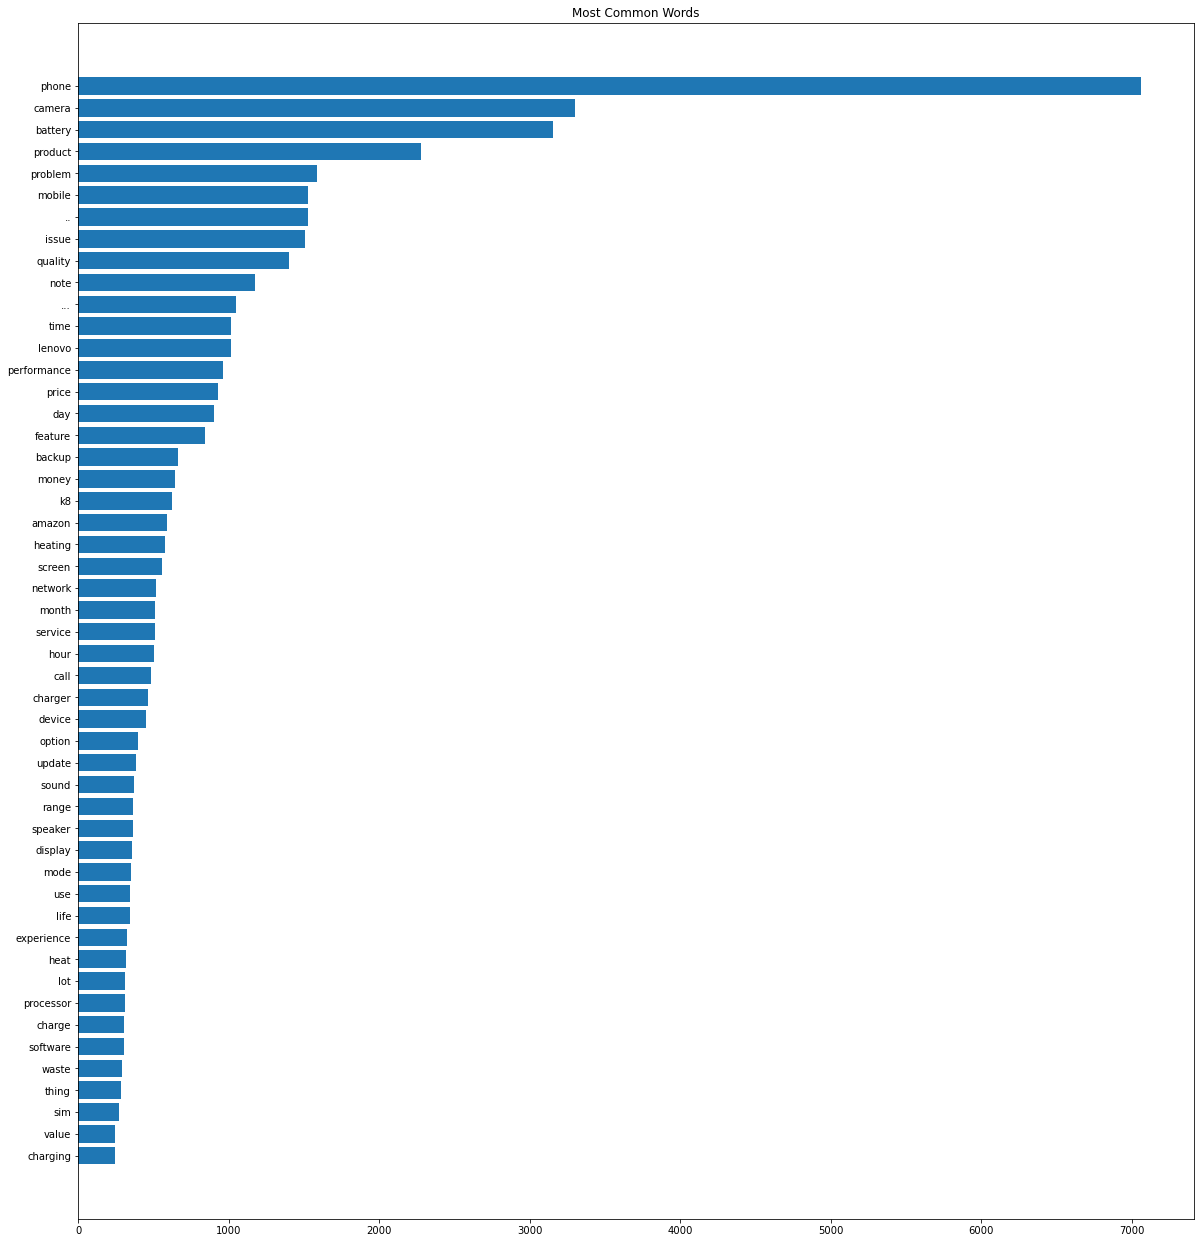

In [19]:
#Let's create a barplot to visualize the 50 most common words 

list_of_words = [word for review in filtered_review_words for word in review]
common_word_freq=FreqDist(list_of_words).most_common(50)
word_list = common_word_freq[::-1]

words,freq = [],[]
for word in word_list:
    words.append(word[0])
    freq.append(word[1])
x=np.array(words)
y=np.array(freq)

plt.figure(figsize=(20,22))
plt.barh(x,y)
plt.title('Most Common Words')
plt.show()

In [20]:
print(common_word_freq)

[('phone', 7062), ('camera', 3303), ('battery', 3157), ('product', 2279), ('problem', 1589), ('mobile', 1530), ('..', 1527), ('issue', 1509), ('quality', 1404), ('note', 1177), ('...', 1047), ('time', 1019), ('lenovo', 1013), ('performance', 961), ('price', 931), ('day', 905), ('feature', 844), ('backup', 667), ('money', 644), ('k8', 626), ('amazon', 588), ('heating', 575), ('screen', 555), ('network', 519), ('month', 508), ('service', 508), ('hour', 506), ('call', 483), ('charger', 467), ('device', 449), ('option', 399), ('update', 385), ('sound', 369), ('range', 368), ('speaker', 366), ('display', 356), ('mode', 354), ('use', 344), ('life', 343), ('experience', 328), ('heat', 316), ('lot', 314), ('processor', 309), ('charge', 307), ('software', 303), ('waste', 289), ('thing', 282), ('sim', 270), ('value', 247), ('charging', 246)]


From the above o/p we see that there are some punctuations that are still appear in the word tokens like '..' and '...'. we can also see that the list consists of emojis which are not relevant for topic modelling,Further there are also just numbers in the place of words - like '1' and '2' which are not relevant.
From the topic modelling perspective we can remove the obvious and contextual stop words like 'hi','hello','phone','lenovo','mobile','k8','product'.

In [21]:
#Let's Revise the stopwords based on the above analysis
aditional_stop_words= ["...","..",'phone','good','bad','lenovo','k8','note','product',
                         'mobile','hai','please','pls','star','hi','ho','ok','superb','handset']
stop_words = stop_words + aditional_stop_words

#isalnum() to remove emoji an isnumeric() to remove only number tokens present in the list 
#len(word)!=1 will eliminate all one letter tokens such as 'u','i' etc.
final_review_words = []
for review in filtered_review_words:
    stopwords_removed_review=[]
    for word in review:
        if word not in stop_words and word.isalnum() and (not word.isnumeric()) and len(word)!=1: 
            stopwords_removed_review.append(word)
    final_review_words.append(stopwords_removed_review)

In [22]:
print('Length :',len(final_review_words))

Length : 13453


In [23]:
#let's Clear any reviews which are now empty lists after the removal of revised stop words
final_review_words=[review for review in final_review_words if len(review)>=1]

In [24]:
print('Length :',len(final_review_words))

Length : 11858


In [25]:
print(final_review_words[:50])

[['update', 'improvement'], ['battery', 'hell', 'backup', 'hour', 'us', 'idle', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour'], ['cash'], ['everthey', 'problem', 'amazon', 'amazon'], ['camerawaste', 'money'], ['allot', 'reason'], ['battery', 'level'], ['problem', 'hanging', 'problem', 'station', 'ahmedabad', 'year'], ['lot', 'glitch', 'thing', 'option'], ['wrost'], ['charger', 'damage', 'month'], ['item', 'battery', 'life'], ['battery', 'problem', 'motherboard', 'problem', 'month', 'life'], ['slim', 'battry', 'backup', 'screen'], ['headset'], ['time'], ['prize', 'range', 'specification', 'comparison', 'range', 'seal', 'credit', 'card', 'deal', 'amazon'], ['battery', 'solution', 'battery', 'life'], ['smartphone'], ['galery', 'problem', 'speaker'], ['camera', 'battery'], ['camera', 'battery'], ['option', 'cast', 'screen', 'wifi', 'call', 'option', 'hotspot'], ['usb', 'cable'], ['price', 'display'], ['specification', 'function'], ['fon', 'fon', 'speekars'], ['issue', 'color', 's

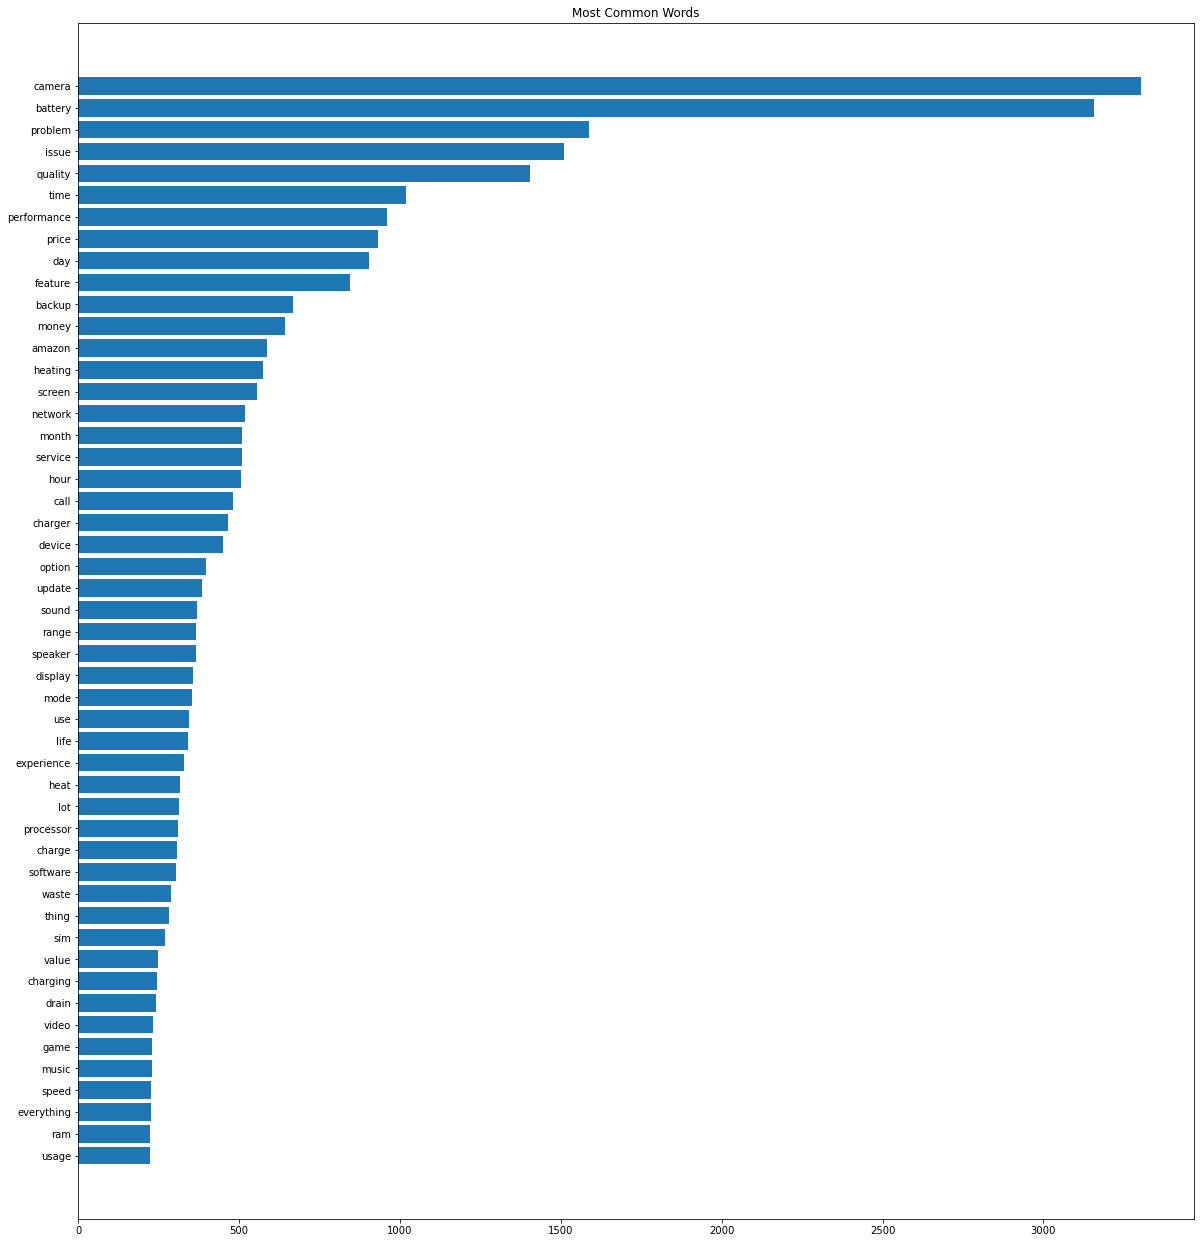

In [26]:
#Let's create a barplot to visualize the 50 most common words 

list_of_words = [word for review in final_review_words for word in review]
word_freq=FreqDist(list_of_words).most_common(50)
word_list_2 = word_freq[::-1]

words,freq = [],[]
for word in word_list_2:
    words.append(word[0])
    freq.append(word[1])
x=np.array(words)
y=np.array(freq)

plt.figure(figsize=(20,22))
plt.barh(x,y)
plt.title('Most Common Words')
plt.show()

#### 8. Create a topic model using LDA on the cleaned-up data with 12 topics.
  - Print out the top terms for each topic.
  - What is the coherence of the model with the c_v metric?

In [27]:
#Firstly Let's create the id2word Dictionary and corpus of words required for the LDA topic model

id2word = corpora.Dictionary(final_review_words)

corpus =[] 
for review in final_review_words:
    new = id2word.doc2bow(review)
    corpus.append(new)
    
print(corpus[:20],"\n")
print("Number of reviews:",len(corpus),"\n")
print("Number of unique words:",len(id2word),"\n")


[[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1)], [(2, 2), (13, 1), (14, 1)], [(15, 1), (16, 1)], [(17, 1), (18, 1)], [(4, 1), (19, 1)], [(14, 2), (20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1)], [(5, 1), (29, 1), (30, 1)], [(4, 1), (31, 1), (32, 1)], [(4, 1), (14, 2), (30, 1), (32, 1), (33, 1)], [(3, 1), (34, 1), (35, 1), (36, 1)], [(37, 1)], [(38, 1)], [(2, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1)], [(4, 2), (32, 1), (47, 1)], [(48, 1)], [(14, 1), (49, 1), (50, 1)]] 

Number of reviews: 11858 

Number of unique words: 6341 



In [28]:
#Let's Create a topic model using LDA on the cleaned-up data with 12 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12,
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [29]:
lda_model.print_topics()

[(0,
  '0.109*"money" + 0.072*"heat" + 0.062*"software" + 0.037*"value" + 0.034*"ram" + 0.034*"support" + 0.032*"game" + 0.026*"model" + 0.024*"contact" + 0.023*"headphone"'),
 (1,
  '0.269*"time" + 0.117*"charger" + 0.064*"turbo" + 0.037*"button" + 0.033*"effect" + 0.033*"power" + 0.030*"message" + 0.029*"number" + 0.027*"pic" + 0.024*"cam"'),
 (2,
  '0.159*"price" + 0.150*"performance" + 0.105*"network" + 0.064*"range" + 0.061*"speaker" + 0.034*"hr" + 0.029*"photo" + 0.023*"flash" + 0.021*"memory" + 0.016*"gb"'),
 (3,
  '0.411*"camera" + 0.163*"quality" + 0.032*"everything" + 0.024*"drain" + 0.023*"stock" + 0.021*"android" + 0.016*"image" + 0.014*"lag" + 0.014*"side" + 0.012*"earphone"'),
 (4,
  '0.143*"processor" + 0.107*"use" + 0.107*"music" + 0.050*"core" + 0.031*"deca" + 0.030*"ko" + 0.027*"awesome" + 0.025*"gaming" + 0.022*"concern" + 0.021*"k5"'),
 (5,
  '0.194*"feature" + 0.111*"call" + 0.075*"sound" + 0.069*"option" + 0.034*"buy" + 0.030*"front" + 0.028*"thanks" + 0.022*"spec

In [30]:
#Let's print the Top terms for each topic.

topics=[]
topic_terms=[]
for idx in range(12):
    topics.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model.get_topic_terms(idx,topn=10):
        terms.append(id2word[term[0]])
    topic_terms.append(terms)
    
for idx in range(12):
    print(idx,topic_terms[idx])

0 ['money', 'heat', 'software', 'value', 'ram', 'support', 'game', 'model', 'contact', 'headphone']
1 ['time', 'charger', 'turbo', 'button', 'effect', 'power', 'message', 'number', 'pic', 'cam']
2 ['price', 'performance', 'network', 'range', 'speaker', 'hr', 'photo', 'flash', 'memory', 'gb']
3 ['camera', 'quality', 'everything', 'drain', 'stock', 'android', 'image', 'lag', 'side', 'earphone']
4 ['processor', 'use', 'music', 'core', 'deca', 'ko', 'awesome', 'gaming', 'concern', 'k5']
5 ['feature', 'call', 'sound', 'option', 'buy', 'front', 'thanks', 'specification', 'gallery', 'voice']
6 ['month', 'update', 'bit', 'replacement', 'budget', 'glass', 'sensor', 'company', 'smartphone', 'purchase']
7 ['battery', 'problem', 'issue', 'day', 'heating', 'backup', 'mode', 'display', 'video', 'usage']
8 ['service', 'delivery', 'speed', 'customer', 'app', 'system', 'center', 'refund', 'hang', 'need']
9 ['screen', 'life', 'charging', 'card', 'box', 'cast', 'expectation', 'way', 'today', 'connectivit

In [31]:
#Let's create a dataframe of the top terms in each topic 
print('Topics DataFrame : ')
topics_df = pd.DataFrame(topic_terms).transpose()
topics_df.columns = topics
topics_df

Topics DataFrame : 


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12
0,money,time,price,camera,processor,feature,month,battery,service,screen,device,amazon
1,heat,charger,performance,quality,use,call,update,problem,delivery,life,hour,charge
2,software,turbo,network,everything,music,sound,bit,issue,speed,charging,waste,lot
3,value,button,range,drain,core,option,replacement,day,customer,card,sim,mark
4,ram,effect,speaker,stock,deca,buy,budget,heating,app,box,experience,work
5,support,power,hr,android,ko,front,glass,backup,system,cast,return,dolby
6,game,message,photo,image,awesome,thanks,sensor,mode,center,expectation,data,apps
7,model,number,flash,lag,gaming,specification,company,display,refund,way,picture,min
8,contact,pic,memory,side,concern,gallery,smartphone,video,hang,today,slot,super
9,headphone,cam,gb,earphone,k5,voice,purchase,usage,need,connectivity,signal,class


In [32]:
#Let's find the coherence of the model with the c_v metric

coherence_model_lda = CoherenceModel(model=lda_model, texts=final_review_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score : ', coherence_lda)

Coherence Score :  0.3818475081344903


#### 9. Analyze the topics through the business lens.
  - Determine which of the topics can be combined.

In [34]:
#Let's visualize the LDA Model using the Python library pyLDAvis for interactive topic model visualization
pyLDAvis.enable_notebook()
viz=pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word,mds='mmds',R=10)
viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.457710  0.174282       1        1  23.442018
3      0.383520 -0.272774       2        1  12.854551
2     -0.359836 -0.288363       3        1   9.055893
0     -0.088097 -0.414034       4        1   8.437790
10    -0.069951  0.060085       5        1   7.129265
5     -0.427224  0.130673       6        1   6.976014
6      0.271380 -0.016175       7        1   6.907340
8      0.130547 -0.332882       8        1   6.548187
9      0.190126  0.365566       9        1   5.309795
1     -0.005983  0.341051      10        1   5.163990
11    -0.240291  0.344872      11        1   5.008560
4     -0.241900 -0.092299      12        1   3.166600, topic_info=         Term         Freq        Total Category  logprob  loglift
51     camera  3637.000000  3637.000000  Default  10.0000  10.0000
4     battery  3414.000000  3414.000000  Default   9.0000   9.0000
87    quality  1440.000000  1440.000000  Default   8.0000   8.0000
38       time   959.000000   959.000000  Default   7.0000   7.0000
14    problem  1808.000000  1808.000000  Default   6.0000   6.0000
...       ...          ...          ...      ...      ...      ...
1419       ko    64.599389    65.573416  Topic12  -3.5194   3.4375
598   awesome    59.812617    60.786575  Topic12  -3.5964   3.4364
200    gaming    54.890993    55.864960  Topic12  -3.6822   3.4349
1362  concern    47.155995    48.130022  Topic12  -3.8341   3.4321
392        k5    46.192321    47.166283  Topic12  -3.8548   3.4316

[130 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2        11  0.999125   amazon
175       2  0.994132  android
578       8  0.995033      app
104      11  0.993073     apps
598      12  0.987060  awesome
...     ...       ...      ...
533       1  0.996602    video
174       6  0.988631    voice
164       5  0.995675    waste
207       9  0.993524      way
187      11  0.997288     work

[120 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 3, 1, 11, 6, 7, 9, 10, 2, 12, 5])

#### From the analysis of LDA model with 12 topics we can combine the topics as shown below. The ideal number of topics would be 4 

<table>
    <thead>
        <td style="text-align:center"><b>Final Topics</b></td>
        <td style="text-align:center"><b>Present LDA model Topics</b></td>
        <td style="text-align:center"><b>Final topic classification made based on the keywords</b></td>
    </thead>
<tbody>
    <tr>
        <td style="text-align:center">Customer support and Services</td>	
        <td style="text-align:center">3,8</td>
        <td style="text-align:center">Amazon, service, support, replacement , refund, purchase, expectation,  gorilla , glass, button, power, range, software, game</td>
    </tr>
    <tr>
        <td style="text-align:center">General Usage Experience </td>		
        <td style="text-align:center">2,9</td>		
        <td style="text-align:center">Camera, quality, day, time, use, usage, time, network, call, signal, volta, music, speaker, processor, app, charging</td>	
    </tr>
    <tr>
       <td style="text-align:center">Phone features and performances</td>	
       <td style="text-align:center">4,7,11,12</td>	
       <td style="text-align:center">Feature, performance, speed, ram, price, sim, sound, experience, display, screen, video, stock, android, user, interface, apps, response, contact, gallery, photo, flash, mp, sensor, clarity</td>
    </tr>
    <tr>
       <td style="text-align:center">Quality and Pricing issues</td>	
       <td style="text-align:center">1,5,6,10</td>	
       <td style="text-align:center">Issue, problem, waste, update, bug, function, battery, backup, hour, hr, life, charger, charge, heat, heating, money, value, worth, cost, budget</td>
    </tr>
</tbody>
</table>

#### 9. Create topic model using LDA with what you think is the optimal number of topics
   - What is the coherence of the model?

In [35]:
#Let's Create a topic model using LDA  with 4 topics
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=47,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto") 

In [36]:
lda_model_2.print_topics()

[(0,
  '0.087*"problem" + 0.075*"issue" + 0.053*"time" + 0.034*"money" + 0.033*"heating" + 0.025*"update" + 0.022*"heat" + 0.019*"software" + 0.017*"charge" + 0.017*"waste"'),
 (1,
  '0.117*"camera" + 0.102*"battery" + 0.046*"quality" + 0.031*"day" + 0.031*"price" + 0.029*"performance" + 0.020*"network" + 0.018*"backup" + 0.016*"device" + 0.014*"hour"'),
 (2,
  '0.063*"feature" + 0.039*"amazon" + 0.037*"month" + 0.036*"call" + 0.032*"service" + 0.029*"charger" + 0.024*"sound" + 0.022*"option" + 0.020*"delivery" + 0.016*"bit"'),
 (3,
  '0.045*"screen" + 0.028*"life" + 0.019*"turbo" + 0.019*"charging" + 0.016*"ram" + 0.016*"work" + 0.016*"budget" + 0.016*"glass" + 0.014*"card" + 0.013*"sensor"')]

In [37]:
#Let's print the Top terms for each topic.

topics_model2=[]
topic_terms_model2=[]
for idx in range(4):
    topics_model2.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model_2.get_topic_terms(idx,topn=10):
        terms.append(id2word[term[0]])
    topic_terms_model2.append(terms)
    
for idx in range(4):
    print(idx,topic_terms_model2[idx])

0 ['problem', 'issue', 'time', 'money', 'heating', 'update', 'heat', 'software', 'charge', 'waste']
1 ['camera', 'battery', 'quality', 'day', 'price', 'performance', 'network', 'backup', 'device', 'hour']
2 ['feature', 'amazon', 'month', 'call', 'service', 'charger', 'sound', 'option', 'delivery', 'bit']
3 ['screen', 'life', 'turbo', 'charging', 'ram', 'work', 'budget', 'glass', 'card', 'sensor']


In [38]:
#Let's create a dataframe of the top terms in each topic 
topics_model_2_df= pd.DataFrame(topic_terms_model2).transpose()
topics_model_2_df.columns=topics_model2
topics_model_2_df

,Topic 1,Topic 2,Topic 3,Topic 4
0,problem,camera,feature,screen
1,issue,battery,amazon,life
2,time,quality,month,turbo
3,money,day,call,charging
4,heating,price,service,ram
5,update,performance,charger,work
6,heat,network,sound,budget
7,software,backup,option,glass
8,charge,device,delivery,card
9,waste,hour,bit,sensor


In [39]:
# Coherence of the new model

coherence_model_lda_2 = CoherenceModel(model=lda_model_2, texts=final_review_words, dictionary=id2word, coherence='c_v')
coherence_lda_2 = coherence_model_lda_2.get_coherence()
print('\nCoherence Score: ', coherence_lda_2)


Coherence Score:  0.510218984012


In [40]:
viz2 =pyLDAvis.gensim_models.prepare(lda_model_2,corpus,id2word,mds='mmds',R=25)
viz2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.294969 -0.203666       1        1  41.835407
0     -0.161806  0.294352       2        1  24.595867
2      0.204328 -0.250376       3        1  18.810051
3      0.252447  0.159690       4        1  14.758675, topic_info=        Term         Freq        Total Category  logprob  loglift
51    camera  3381.000000  3381.000000  Default  25.0000  25.0000
4    battery  2927.000000  2927.000000  Default  24.0000  24.0000
14   problem  1476.000000  1476.000000  Default  23.0000  23.0000
64     issue  1270.000000  1270.000000  Default  22.0000  22.0000
89   feature   818.000000   818.000000  Default  21.0000  21.0000
..       ...          ...          ...      ...      ...      ...
466  gallery    85.708867    86.464725   Topic4  -4.7758   1.9046
335    super    77.982107    78.727563   Topic4  -4.8703   1.9038
836      pic    81.193060    81.977637   Topic4  -4.8299   1.9037
254     hand    77.626405    78.407052   Topic4  -4.8749   1.9033
63     color    68.718648    69.498868   Topic4  -4.9967   1.9020

[129 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2         3  0.998883       amazon
578       3  0.998314          app
555       3  0.994511  application
3         1  0.998720       backup
4         1  0.999792      battery
...     ...       ...          ...
533       2  0.872798        video
174       3  0.988442        voice
306       4  0.996740        volta
164       2  0.996265        waste
187       4  0.996562         work

[107 rows x 3 columns], R=25, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

#### 11. The business should be able to interpret the topics.
   - Name each of the identified topics.
   - Create a table with the topic name and the top 10 terms in each to present to the business.

#### Name each of the identified topics.
<br>
Final Topics are as follows:

**Topic1** = Problems and Issues (Based on the keywords : Problem, issue, heat, heating, time, waste, money, software, update, flash, charge, replacement, refund, customer, center, sim ,signal )

**Topic2** = Usage Experience (Based on the keywords : Camera, quality, battery, backup, day, price, performance, speed, range, network, use, usage , speaker, music )

**Topic3** = Customer Support and Service (Based on the keywords: Amazon, delivery, call, service, purchase, support, app, notification,system, photo, charger, sound, dolby, touch, memory, slot )     

**Topic4** = Hardware Specifications  (Based on the keywords : Screen, life, turbo, charging, ram, budget, glass, gorilla, sensor, image, gallery, pic, color, headphone )


In [41]:
#let's Create a table with the final topic names and the top 10 terms in each to present to the  business.

Finaltopics= ["Problems and Issues","Usage Experience", "Customer support and Service", "Hardware Specifications"]
topics_model_2_df.columns=Finaltopics
topics_model_2_df

,Problems and Issues,Usage Experience,Customer support and Service,Hardware Specifications
0,problem,camera,feature,screen
1,issue,battery,amazon,life
2,time,quality,month,turbo
3,money,day,call,charging
4,heating,price,service,ram
5,update,performance,charger,work
6,heat,network,sound,budget
7,software,backup,option,glass
8,charge,device,delivery,card
9,waste,hour,bit,sensor


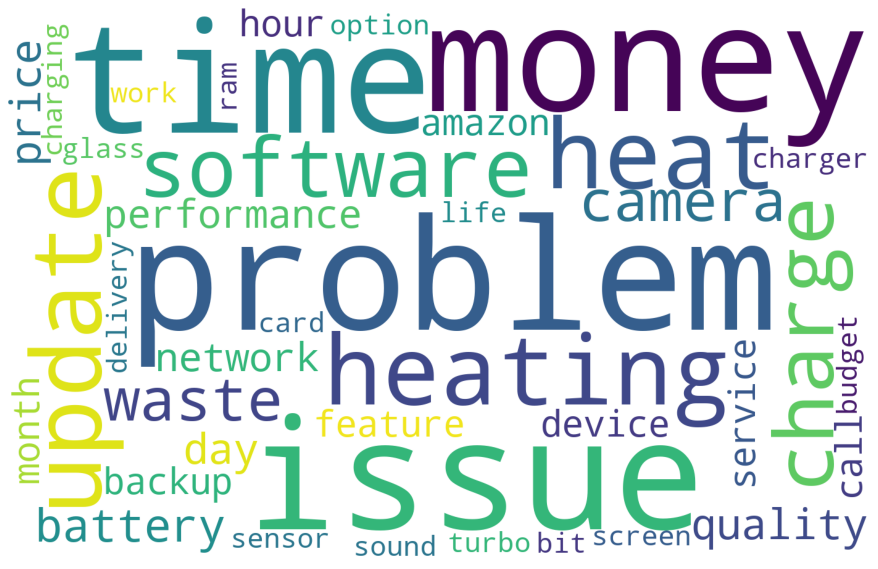

In [42]:
from wordcloud import WordCloud, STOPWORDS
topic_words = " "
stopwords = set(STOPWORDS)
tokens=[]
for topic in topic_terms_model2:
    for word in topic:
        tokens.append(word)

topic_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1400, height = 900,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 8, max_font_size=250).generate(topic_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

                                       --------------------- THANK YOU ----------------------